# Airline-Satisfaction-Model

In [2]:
# Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# Reading the dataset 
df = pd.read_csv('air.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (103904, 25)


In [8]:
# Information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [10]:
# Describing the datset 
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [12]:
# Columns 
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [14]:
# Removing the 'Unnamed: 0' column 
df = df.drop(columns = ['Unnamed: 0', 'id'], axis = 1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [16]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [18]:
# Renaming the columns for better understanding and handling 

df = df.rename({'Customer Type': 'CustomerType', 'Type of Travel': 'TypeOfTravel', 'Flight Distance': 'FlightDistance', 
           'Inflight wifi service': 'InflightWifiService', 'Departure/Arrival time convenient': 'DepartureOrArrivalTimeConvenient', 
           'Ease of Online booking': 'EaseOfOnlineBooking', 'Gate location': 'GateLocation', 'Food and drink': 'FoodAndDrink', 
           'Online boarding': 'OnlineBoarding', 'Seat comfort': 'SeatComfort', 'Inflight entertainment': 'InflightEntertainment',
           'On-board service': 'On_BoardService', 'Leg room service': 'LegRoomService', 'Baggage handling': 'BaggageHandling', 
           'Checkin service': 'CheckinService', 'Inflight service': 'InflightService', 'Departure Delay in Minutes': 'DepartureDelayInMinutes', 
           'Arrival Delay in Minutes': 'ArrivalDelayInMinutes', 'satisfaction': 'Satisfaction'}, axis = 1)

In [20]:
df.columns

Index(['Gender', 'CustomerType', 'Age', 'TypeOfTravel', 'Class',
       'FlightDistance', 'InflightWifiService',
       'DepartureOrArrivalTimeConvenient', 'EaseOfOnlineBooking',
       'GateLocation', 'FoodAndDrink', 'OnlineBoarding', 'SeatComfort',
       'InflightEntertainment', 'On_BoardService', 'LegRoomService',
       'BaggageHandling', 'CheckinService', 'InflightService', 'Cleanliness',
       'DepartureDelayInMinutes', 'ArrivalDelayInMinutes', 'Satisfaction'],
      dtype='object')

# Handling null values 

In [23]:
# Finding the null values in each column 
df.isnull().sum()

Gender                                0
CustomerType                          0
Age                                   0
TypeOfTravel                          0
Class                                 0
FlightDistance                        0
InflightWifiService                   0
DepartureOrArrivalTimeConvenient      0
EaseOfOnlineBooking                   0
GateLocation                          0
FoodAndDrink                          0
OnlineBoarding                        0
SeatComfort                           0
InflightEntertainment                 0
On_BoardService                       0
LegRoomService                        0
BaggageHandling                       0
CheckinService                        0
InflightService                       0
Cleanliness                           0
DepartureDelayInMinutes               0
ArrivalDelayInMinutes               310
Satisfaction                          0
dtype: int64

In [25]:
# Filling the null values of the columns 'ArrivalDelayInMinutes' with 0
df['ArrivalDelayInMinutes'] = df['ArrivalDelayInMinutes'].fillna(0)

In [27]:
# Checking if null values still exist in the dataset 
df.isnull().sum()

Gender                              0
CustomerType                        0
Age                                 0
TypeOfTravel                        0
Class                               0
FlightDistance                      0
InflightWifiService                 0
DepartureOrArrivalTimeConvenient    0
EaseOfOnlineBooking                 0
GateLocation                        0
FoodAndDrink                        0
OnlineBoarding                      0
SeatComfort                         0
InflightEntertainment               0
On_BoardService                     0
LegRoomService                      0
BaggageHandling                     0
CheckinService                      0
InflightService                     0
Cleanliness                         0
DepartureDelayInMinutes             0
ArrivalDelayInMinutes               0
Satisfaction                        0
dtype: int64

# Data Preparation 

In [30]:
# Numerical columns 
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns
num_cols

Index(['Age', 'FlightDistance', 'InflightWifiService',
       'DepartureOrArrivalTimeConvenient', 'EaseOfOnlineBooking',
       'GateLocation', 'FoodAndDrink', 'OnlineBoarding', 'SeatComfort',
       'InflightEntertainment', 'On_BoardService', 'LegRoomService',
       'BaggageHandling', 'CheckinService', 'InflightService', 'Cleanliness',
       'DepartureDelayInMinutes', 'ArrivalDelayInMinutes'],
      dtype='object')

In [32]:
# Cateforical columns 
cat_cols = df.select_dtypes(include = ['object']).columns
cat_cols

Index(['Gender', 'CustomerType', 'TypeOfTravel', 'Class', 'Satisfaction'], dtype='object')

In [34]:
# Unique values in each column 
for cols in cat_cols:
    print("For column: ", cols)
    print("No of Unique Values: ", df[cols].nunique())
    print("Unique Values: ", df[cols].unique())

For column:  Gender
No of Unique Values:  2
Unique Values:  ['Male' 'Female']
For column:  CustomerType
No of Unique Values:  2
Unique Values:  ['Loyal Customer' 'disloyal Customer']
For column:  TypeOfTravel
No of Unique Values:  2
Unique Values:  ['Personal Travel' 'Business travel']
For column:  Class
No of Unique Values:  3
Unique Values:  ['Eco Plus' 'Business' 'Eco']
For column:  Satisfaction
No of Unique Values:  2
Unique Values:  ['neutral or dissatisfied' 'satisfied']


In [36]:
# Encoding the categorical columns to numeric columns 
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['CustomerType'] = df['CustomerType'].replace({'Loyal Customer': 1, 'disloyal Customer': 0})
df['TypeOfTravel'] = df['TypeOfTravel'].replace({'Business travel': 1, 'Personal Travel': 0})
df['Class'] = df['Class'].replace({'Eco Plus': 2, 'Business': 1, 'Eco': 3})
df['Satisfaction'] = df['Satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})

In [38]:
# Changing the datatype of the column 'ArrivalDelayInMinutes' to 'int64' after rounding to 0 decimal places 
df['ArrivalDelayInMinutes'] = round(df['ArrivalDelayInMinutes'], 0)
df['ArrivalDelayInMinutes'] = df['ArrivalDelayInMinutes'].astype('int64')

In [40]:
# Verifying the datatypes
df.dtypes

Gender                              int64
CustomerType                        int64
Age                                 int64
TypeOfTravel                        int64
Class                               int64
FlightDistance                      int64
InflightWifiService                 int64
DepartureOrArrivalTimeConvenient    int64
EaseOfOnlineBooking                 int64
GateLocation                        int64
FoodAndDrink                        int64
OnlineBoarding                      int64
SeatComfort                         int64
InflightEntertainment               int64
On_BoardService                     int64
LegRoomService                      int64
BaggageHandling                     int64
CheckinService                      int64
InflightService                     int64
Cleanliness                         int64
DepartureDelayInMinutes             int64
ArrivalDelayInMinutes               int64
Satisfaction                        int64
dtype: object

# Model Traning 

In [42]:
# Setting X, y values 
X = df.drop('Satisfaction', axis = 1)
y = df['Satisfaction']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [46]:
# LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8225402848814827

In [47]:
lr.score(X_test, y_test)

0.8241370460669832

In [48]:
# Random Forest Classifier 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

1.0

In [49]:
rf.score(X_test, y_test)

0.9617284742717823

In [51]:
# Gaussian naive bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_train, y_train)

0.8658087224330419

In [53]:
gnb.score(X_test, y_test)

0.8650391376876684

In [54]:
# Random Forest Classifier is performing better 
y_pred = rf.predict(X_test)

In [55]:
y_pred.shape

(31172,)

In [56]:
# Model Evaluation 

cm = confusion_matrix(y_test, y_pred)
cm

array([[17190,   365],
       [  828, 12789]])

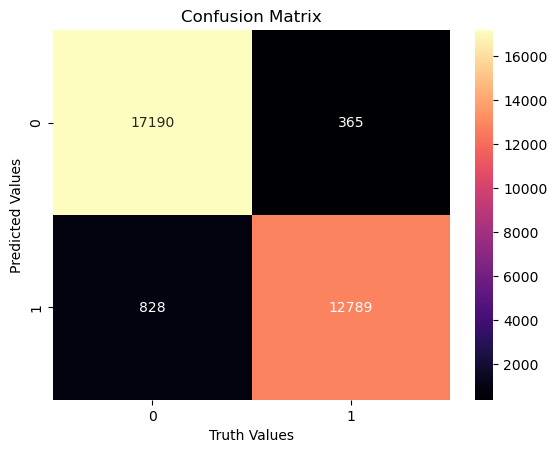

In [57]:
# Heatmap for predicted and actual values 
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'magma')
plt.title('Confusion Matrix')
plt.xlabel("Truth Values")
plt.ylabel("Predicted Values")
plt.show()

In [58]:
# Classificatioin Report
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True)).transpose()
report_df.head()

,precision,recall,f1-score,support
0,0.954046,0.979208,0.966463,17555.000000
1,0.972252,0.939194,0.955437,13617.000000
accuracy,0.961728,0.961728,0.961728,0.961728
macro avg,0.963149,0.959201,0.960950,31172.000000
weighted avg,0.961999,0.961728,0.961647,31172.000000


# Important Features 

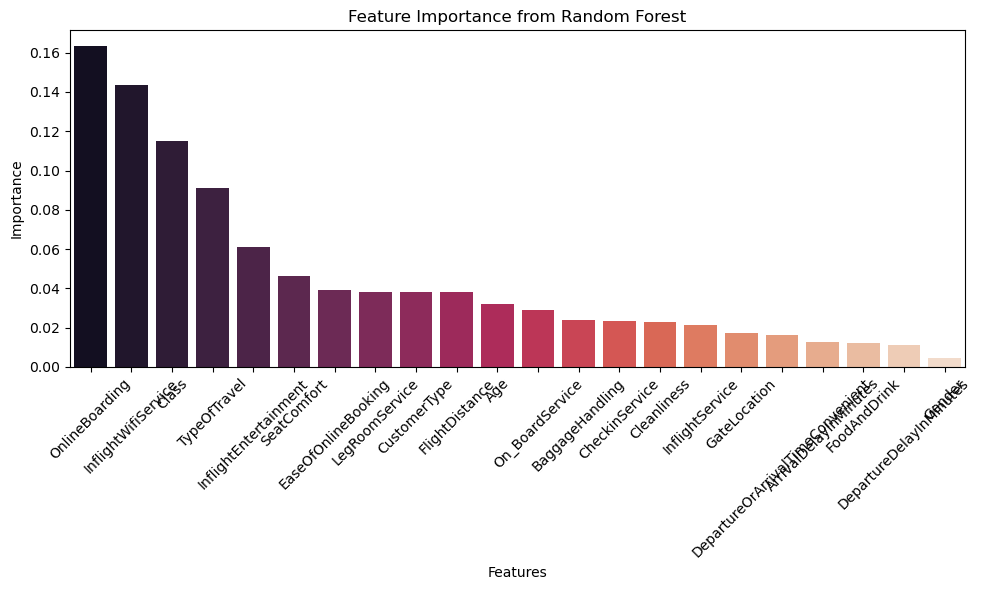

In [74]:
# Feature Importance 
imp_fea = rf.feature_importances_
fea = X_train.columns

imp_fea_df = pd.DataFrame({
    'Features': fea,
    'Importance': imp_fea
}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(data = imp_fea_df, x = 'Features', y = 'Importance', palette = 'rocket')
plt.xticks(rotation = 45)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()